# Notebook Overview

This notebook analyzes the token length distribution of a telecom-specific dataset to understand input size characteristics before model training. The workflow is:

Dataset Loading
A JSONL dataset (/mnt/data/3gpp_testing.jsonl) is loaded using the Hugging Face datasets library. Each entry contains a text field.

Tokenizer Setup
The LLaMA-2 tokenizer is loaded from "/mnt/data/llama2-model". Since LLaMA does not define a padding token by default, the eos_token is assigned as the padding token for compatibility.

Token Length Computation
For each dataset example, the number of tokens in the text field is computed using the tokenizer and stored as a new column (input_length).

Visualization
A histogram is plotted with 50 bins to show the distribution of input lengths across the dataset, giving an overview of how long the sequences typically are.

Descriptive Statistics
Key statistics are calculated and printed, including:

Total number of examples

Mean and median length

95th percentile length (useful for truncation strategy)

Maximum sequence length

Map:   0%|          | 0/218347 [00:00<?, ? examples/s]

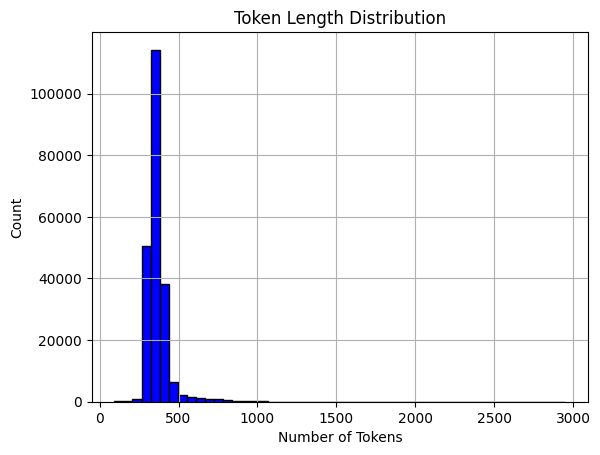

🧮 Token Length Stats:
Total examples: 218347
Mean: 362.00
Median: 349.00
95th percentile: 458
Max: 2951


In [2]:
from datasets import load_dataset
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
dataset_path = "/mnt/data/3gpp_testing.jsonl"  # Update path if needed
dataset = load_dataset("json", data_files=dataset_path, split="train")

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("/mnt/data/llama2-model")
tokenizer.pad_token = tokenizer.eos_token  # Important for LLaMA-2

# Compute token lengths from the "text" field
def compute_length(example):
    return {"input_length": len(tokenizer(example["text"])["input_ids"])}

dataset = dataset.map(compute_length)

# Plot histogram
lengths = dataset["input_length"]
plt.hist(lengths, bins=50, color="blue", edgecolor="black")
plt.title("Token Length Distribution")
plt.xlabel("Number of Tokens")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# Print statistics
print(" Token Length Stats:")
print(f"Total examples: {len(lengths)}")
print(f"Mean: {np.mean(lengths):.2f}")
print(f"Median: {np.median(lengths):.2f}")
print(f"95th percentile: {np.percentile(lengths, 95):.0f}")
print(f"Max: {max(lengths)}")

In [3]:
import torch

print(" CUDA Available:", torch.cuda.is_available())
print(" GPU Name:", torch.cuda.get_device_name(0))
print(" BF16 Supported (PyTorch):", torch.cuda.is_bf16_supported())

✅ CUDA Available: True
🧠 GPU Name: NVIDIA A10G
🔢 BF16 Supported (PyTorch): True
